In [1]:
import sys
sys.path.append("../") # go to parent dir
import os
from pathlib2 import Path
import random
from test_instances.normal_fair_sd_ts_test import NormalFairSDTest
from test_instances.normal_ts_test import  NormalTSTest
from test_instances.normal_sd_ts_test import NormalSDTest
from thompson_sampling.normal_IG_ts import NormalThompsonSampling
from thompson_sampling.normal_IG_stochastic_dominance_ts import NormalStochasticDominance
import numpy as np
from normalBandits import NormalBandits
import pickle 
import matplotlib.pyplot as plt
import plot.plot_data_seperated as plt_sep

np.set_printoptions(threshold=np.nan)
np.set_printoptions(suppress=True)


def plot_all(test_cases):
    plt_sep.plot_delta_subjective_fair(test_cases)
    plt_sep.plot_subjective_min_e1(test_cases)
    plt_sep.plot_delta_smooth_fair(test_cases)
    plt_sep.plot_min_e1(test_cases)
    plt_sep.plot_average_total_regret(test_cases)
    plt_sep.plot_fairness_regret(test_cases)


def save_plot(name):
    i = 0
    name = 'fin_sep_data_' + name
    name_i = name + '_' + format(i) + '.png'
    while Path('/Users/antonm/Desktop/BachelorThesis/Plots/'+name_i).exists():
        i += 1
        name_i = name + '_' + format(i) + '.png'
    plt.savefig('/Users/antonm/Desktop/BachelorThesis/Plots/'+ name_i, bbox_inches='tight')


In [2]:
def get_tests(folder, data_set):
    ts_test = []
    sd_ts_test = []
    fair_sd_ts_test = []
    for file in os.listdir("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder):
        if file.endswith(".file"):
            with open(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder, file), "rb") as f:
                test = pickle.load(f) 
                if test.T >= end_index and test.n_iter == n_iter and test.bandits.data_set_name == data_set:
                    if test.name == 'TS':
                        ts_test.append(test)
                    elif test.name == 'SD  TS' or test.name == 'SD TS':
                        sd_ts_test.append(test)

                    elif test.name == 'Fair SD TS':
                        fair_sd_ts_test.append(test)

                    else:
                        print 'unknwown test name'
    return ts_test, sd_ts_test, fair_sd_ts_test

In [13]:
def plot_min_e1(test_cases):
    T = test_cases[0].T
    x = range(T)




    for test_ind, test in enumerate(test_cases):
        for e2_ind, e2 in enumerate(test.e2_arr):
            for delta_ind, delta in enumerate(test.delta_arr):
                if ALL or (e2 in E2_SELECTION and delta in DELTA_SELECTION and not((e2,delta) in LEAVE_OUT)):
                    if test.name == 'Fair SD TS':
                        algo_name = test.get_name(e2=e2, delta=delta)
                        y = test.min_e1[e2_ind, delta_ind]
                        explore_end_x = test.average_rounds_exploring[e2_ind, delta_ind]
                        if explore_end_x < T:
                            plt.plot(x, y, label=algo_name, marker='o', markevery=[int(explore_end_x)])
                        else:
                            plt.plot(x, y, label=algo_name)      
                    else: 
                        algo_name = test.get_label_name(delta=delta, e2=e2)
                        plt.plot(x, test.min_e1[e2_ind, delta_ind],label=algo_name)

    plt.xlabel('$t$')
    plt.ylabel('minimum $\epsilon_1$ for $(\epsilon_1, 2\epsilon_2, \delta)-fairness$')
    name = 'min_e1_{}_'.format(T)+test_cases[0].bandits.data_set_name

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    save_plot(name)
    plt.show()


def plot_delta_smooth_fair(test_cases, start_index=0):
    T = test_cases[0].T
    x = range(T)

    for test in test_cases:
        #ds_name = test.bandits.data_set_name
        
       
        for e1_ind, e1 in enumerate(test.e1_arr):
           
            for e2_ind, e2 in enumerate(test.e2_arr):
                
                if test.name == 'Fair SD TS':
                    for delta_ind, delta in enumerate(test.delta_arr):
                        if ALL or (e2 in E2_SELECTION and delta in DELTA_SELECTION and not((e2,delta) in LEAVE_OUT)):

                            algo_name = test.get_name(e1=e1, e2=e2, delta=delta)
                            y = np.min(np.min(test.frac_smooth_fair[e1_ind, e2_ind, delta_ind], axis=1),
                                            axis=1)[start_index:]
                            explore_end_x = test.average_rounds_exploring[e2_ind, delta_ind]
                            if explore_end_x < T:
                                plt.plot(x[start_index:], y, label=algo_name, marker='o', markevery=[int(explore_end_x)])
                            else:
                                plt.plot(x[start_index:], y, label=algo_name)
                else:
                    algo_name = test.get_label_name(e1=e1, e2=e2)
                    plt.plot(x[start_index:],
                             np.min(np.min(test.frac_smooth_fair[e1_ind, e2_ind], axis=1), axis=1)
                             [start_index:], label=algo_name)

                # xmin = np.amin(np.min(np.min(test.frac_subjective_smooth_fair[e1_ind, e2_ind], axis=1), axis=1))
                # ymin = np.min(np.min(test.frac_subjective_smooth_fair[e1_ind, e2_ind], axis=1), axis=1)
                # plt.plot(xmin, ymin)
                # plt.annotate((1 - d), xy=(2, 1), xytext=(3, 1.5),
                #              arrowprops=dict(facecolor='black', shrink=0.05),
                #          
    plt.xlabel('$t$')
    plt.ylabel('Smooth fair probability \n $(1-\delta)$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    name = 'delta_smooth_fair_{}'.format(T)
    save_plot(name)


    # bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
def n_info(test_cases):
    for test in test_cases:
        print test.name + 'n' + str(test.average_n[-1])
        print test.name + 'pi prediction' + str(np.average(test.curr_test.pi, axis=0) * T)


In [22]:
T = 1000
n_iter = 100.
end_index=T
folder_normal = 'normal_objects/'+str(T)

In [23]:
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder_normal, 'D0')


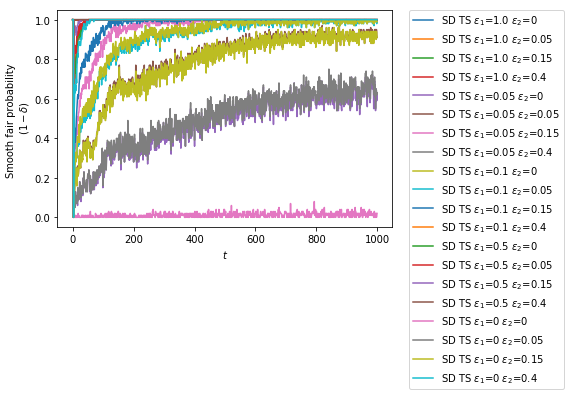

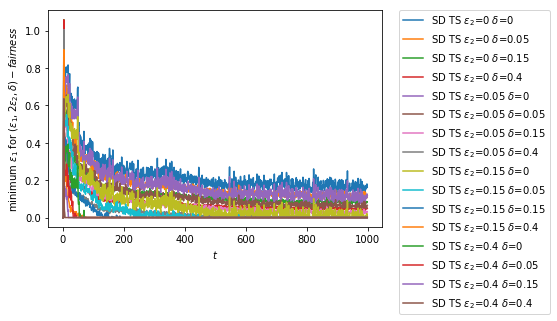

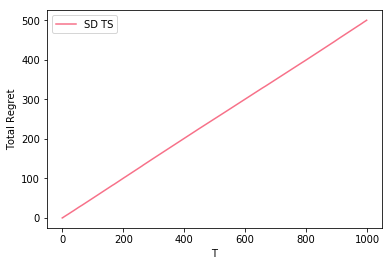

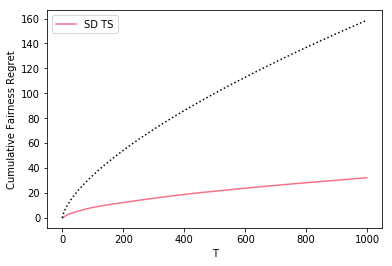

In [31]:
ALL = True
E2_SELECTION = [0.0, 0.05, 0.15, 0.4] #0.02
DELTA_SELECTION = [0.]
LEAVE_OUT = [] #[(0.05,0.3) ]
test_cases = sd_ts_test 
plot_delta_smooth_fair(test_cases)
plot_min_e1(test_cases)
plt_sep.plot_average_total_regret(test_cases)
plt_sep.plot_fairness_regret(test_cases)

In [25]:
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder_normal, 'D1')


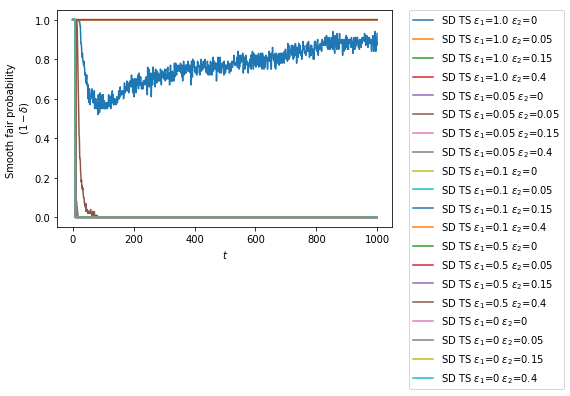

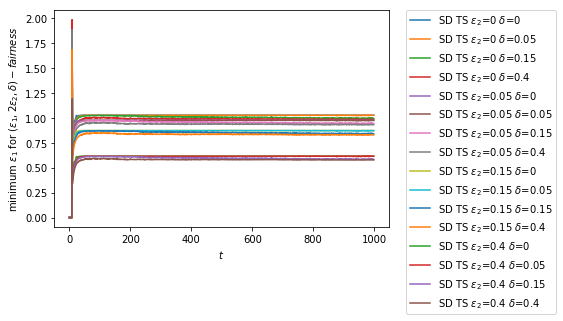

In [26]:
ALL = True
E2_SELECTION = [0.0, 0.05, 0.15, 0.4] #0.02
DELTA_SELECTION = [0.]
LEAVE_OUT = [] #[(0.05,0.3) ]
test_cases = sd_ts_test 
plot_delta_smooth_fair(test_cases)
plot_min_e1(test_cases)
# plt_sep.plot_average_total_regret(test_cases)
# plt_sep.plot_fairness_regret(test_cases)

In [27]:
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder_normal, 'D2')


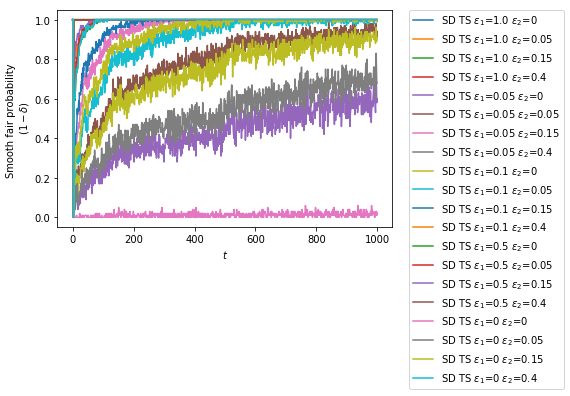

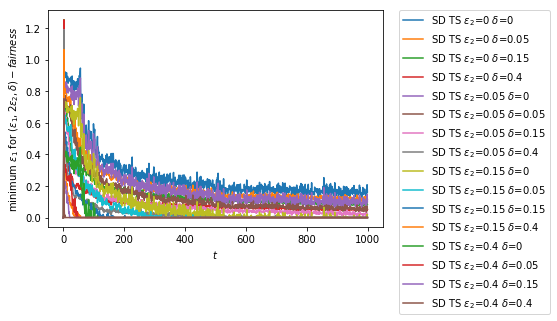

In [28]:
ALL = True
E2_SELECTION = [0.0, 0.05, 0.15, 0.4] #0.02
DELTA_SELECTION = [0.]
LEAVE_OUT = [] #[(0.05,0.3) ]
test_cases = sd_ts_test 
plot_delta_smooth_fair(test_cases)
plot_min_e1(test_cases)
# plt_sep.plot_average_total_regret(test_cases)
# plt_sep.plot_fairness_regret(test_cases)

In [29]:
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder_normal, 'D3')


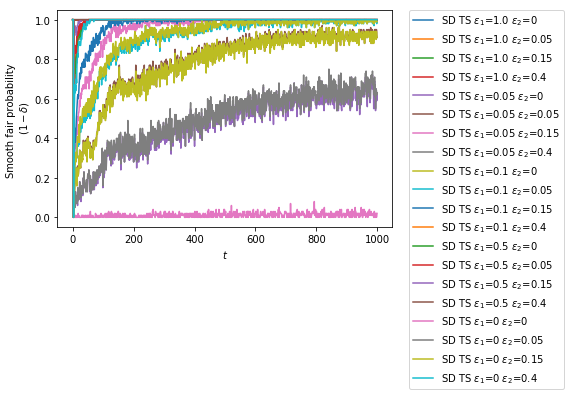

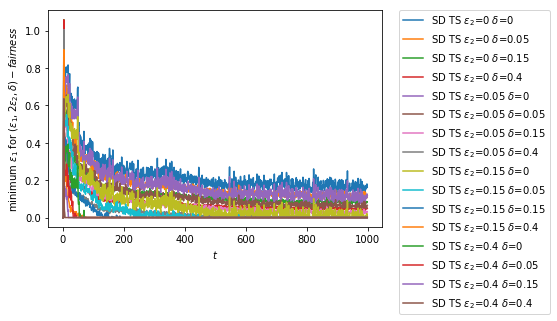

In [30]:
ALL = True
E2_SELECTION = [0.0, 0.05, 0.15, 0.4] #0.02
DELTA_SELECTION = [0.]
LEAVE_OUT = [] #[(0.05,0.3) ]
test_cases = sd_ts_test 
plot_delta_smooth_fair(test_cases)
plot_min_e1(test_cases)
# plt_sep.plot_average_total_regret(test_cases)
# plt_sep.plot_fairness_regret(test_cases)

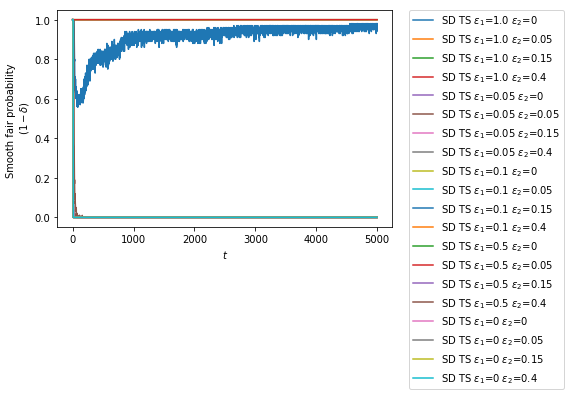

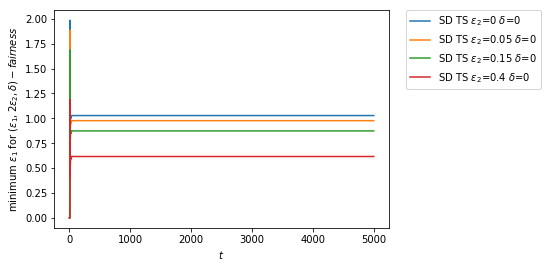

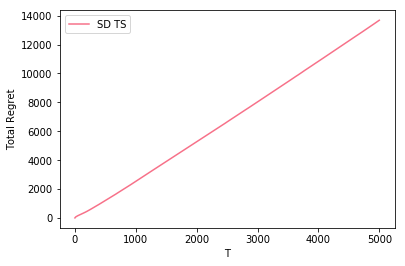

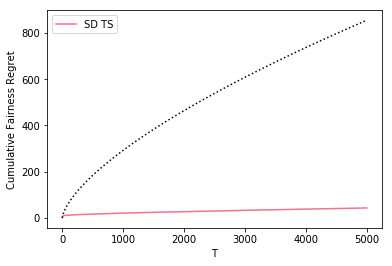

In [16]:
ALL = False
E2_SELECTION = [0.0, 0.05, 0.15, 0.4] #0.02
DELTA_SELECTION = [0.]
LEAVE_OUT = [] #[(0.05,0.3) ]

test_cases = sd_ts_test + ts_test + fair_sd_ts_test
test_cases = sd_ts_test
plot_delta_smooth_fair(test_cases)
plot_min_e1(test_cases)
plt_sep.plot_average_total_regret(test_cases)
plt_sep.plot_fairness_regret(test_cases)

In [18]:
sd_ts_test[0].curr_test.pi

array([[0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [0.2  , 0.2  , 0.2  , 0.2  , 0.2  ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.063, 0.044, 0.777, 0.073, 0.043],
       [0.059, 0.036, 0.812, 0.071, 0.022],
       [0.044, 0.027, 0.846, 0.062, 0.021],
       [0.041, 0.027, 0.867, 0.039, 0.026],
       [0.041, 0.013, 0.9  , 0.027, 0.019],
       [0.039, 0.012, 0.903, 0.031, 0.015],
       [0.03 , 0.008, 0.925, 0.026, 0.011],
       [0.038, 0.013, 0.919, 0.01 , 0.02 ],
       [0.026, 0.009, 0.942, 0.01 , 0.013],
       [0.035, 0.01 , 0.935, 0.011, 0.009],
       [0.032, 0.013, 0.943, 0.003, 0.009],
       [0.034, 0.003, 0.941, 0.012, 0.01 ],
       [0.036, 0.008, 0.948, 0.0

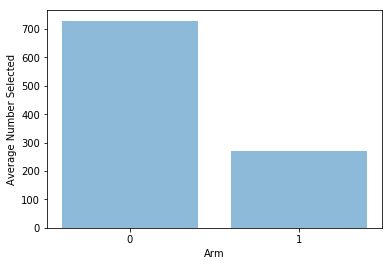

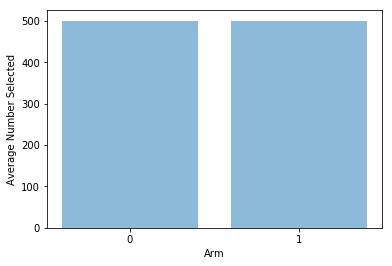

In [9]:
def plot_n(test):
    k = test.bandits.k
    y_pos = np.arange(k)
    plt.bar(y_pos, test.average_n[-1], align='center', alpha=0.5)
    plt.xticks(y_pos, y_pos)
    plt.ylabel('Average Number Selected')
    plt.xlabel('Arm')
    plt.show()
    
plot_n(ts_test[0])
plot_n(sd_ts_test[0])

In [10]:
# ts_test = []

# if TEST_THOMPSON:
#     for bandit in bandits:
#         ts_test.append(NormalTSTest(N_ITERATIONS, bandit, T, e1, e2, delta))
# sd_ts_test = []

# if TEST_SD_TS:
#     for bandit in bandits:
#         sd_ts_test.append(NormalSDTest(N_ITERATIONS, bandit, T, e1, e2[], delta, lam=1))


In [11]:
# for test in ts_test:
#     test.analyse(regret=REGRET, fair_regret=FAIR_REGRET , smooth_fair=SF,
#                  subjective_smooth_fair=SSF, minimum_e1=MIN_E1,
#                  subjective_minimum_e1=SMIN_E1)

# for test in sd_ts_test:
#     test.analyse(regret=REGRET, fair_regret=FAIR_REGRET, smooth_fair=SF,
#                  subjective_smooth_fair=SSF, minimum_e1=MIN_E1,
#                  subjective_minimum_e1=SMIN_E1)